In [1]:
#Import modules
import numpy as np
import tweepy
import time
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
 # Twitter Credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
target_user = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]


In [4]:
analyzer = SentimentIntensityAnalyzer()

sentiments = []


In [6]:
# Loop through all target users
for target in target_user:
    
    counter = 1
    
     # Loop through 10 times (total of 1500 tweets)
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.user_timeline(target, page = x + 1)

        # Loop through all tweets
        for tweet in public_tweets:
                # Run analysis
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            # Add each value to the appropriate array
            sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                            "User": target,
                            "Account": target})
                        
            counter = counter + 1

In [7]:
#put into Dataframe 

sentiments_df =  pd.DataFrame.from_dict(sentiments)
sentiments_df = sentiments_df[["Account", "Date", "Tweets Ago", "Positive", "Neutral", "Negative", "Compound"]]
sentiments_df

,Account,Date,Tweets Ago,Positive,Neutral,Negative,Compound
0,@BBC,Sat Mar 31 21:15:00 +0000 2018,1,0.113,0.000,0.887,0.3947
1,@BBC,Sat Mar 31 20:42:07 +0000 2018,2,0.000,0.117,0.883,-0.1511
2,@BBC,Sat Mar 31 20:15:37 +0000 2018,3,0.000,0.000,1.000,0.0000
3,@BBC,Sat Mar 31 18:37:18 +0000 2018,4,0.198,0.000,0.802,0.5719
4,@BBC,Sat Mar 31 18:02:02 +0000 2018,5,0.235,0.000,0.765,0.5574
5,@BBC,Sat Mar 31 17:09:06 +0000 2018,6,0.136,0.125,0.739,-0.2023
6,@BBC,Sat Mar 31 16:31:15 +0000 2018,7,0.000,0.000,1.000,0.0000
7,@BBC,Sat Mar 31 16:15:07 +0000 2018,8,0.000,0.000,1.000,0.0000
8,@BBC,Sat Mar 31 15:43:37 +0000 2018,9,0.000,0.000,1.000,0.0000
9,@BBC,Sat Mar 31 15:42:42 +0000 2018,10,0.337,0.000,0.663,0.7650


In [8]:
 #Export to CSV
sentiments_df.to_csv("hw_sentiments.csv", index = False)


In [9]:
cnn_sentiments_df = sentiments_df.loc[sentiments_df["Account"] == "@CNN"]
bbc_sentiments_df = sentiments_df.loc[sentiments_df["Account"] == "@BBC"]
cbs_sentiments_df = sentiments_df.loc[sentiments_df["Account"] == "@CBS"]
nytimes_sentiments_df = sentiments_df.loc[sentiments_df["Account"] == "@nytimes"]
fox_sentiments_df = sentiments_df.loc[sentiments_df["Account"] == "@FoxNews"]

In [10]:
cnn_compound = round((cnn_sentiments_df["Compound"].mean()),2)
bbc_compound = round((bbc_sentiments_df["Compound"].mean()),2)
cbs_compound = round((cbs_sentiments_df["Compound"].mean()),2)
nytimes_compound = round((nytimes_sentiments_df["Compound"].mean()),2)
foxnews_compound = round((fox_sentiments_df["Compound"].mean()),2)

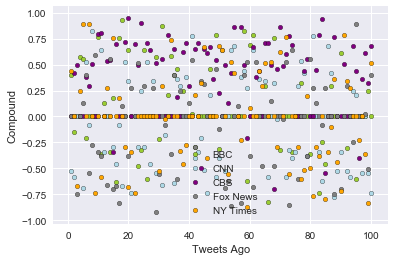

In [16]:
#Charts
sns.set()

main_plot = bbc_sentiments_df.plot(kind='scatter', x= 'Tweets Ago', y= "Compound", color = "yellowgreen",edgecolors="black", grid = True, legend = True, label = "BBC")
cnn_sentiments_df.plot(kind='scatter', x= 'Tweets Ago', y= "Compound", color = "lightblue",edgecolors="black", grid = True, legend = True, label = "CNN", ax = main_plot)
cbs_sentiments_df.plot(kind='scatter', x= 'Tweets Ago', y= "Compound", color = "purple",edgecolors="black", grid = True, legend = True, label = "CBS", ax = main_plot)
fox_sentiments_df.plot(kind='scatter', x= 'Tweets Ago', y= "Compound", color = "grey",edgecolors="black", grid = True, legend = True, label = "Fox News", ax = main_plot)
nytimes_sentiments_df.plot(kind='scatter', x= 'Tweets Ago', y= "Compound", color = "orange",edgecolors="black", grid = True, legend = True, label = "NY Times", ax = main_plot)
plt.title("Sentiment Analysis of News Account Tweets")
plt.savefig("hwsentiment1.png"
plt.show()

In [ ]:
plt.show()

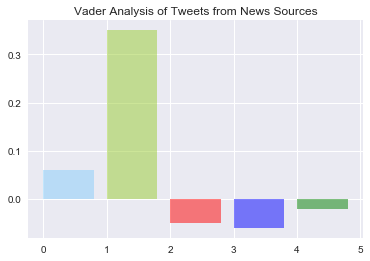

In [18]:
channels = [bbc_compound, cbs_compound, cnn_compound, foxnews_compound, nytimes_compound]
x_axis = np.arange(len(channels))
plt.bar(x_axis, channels, color=['lightskyblue', 'yellowgreen', 'red', 'blue', 'green'], alpha=0.5, align="edge")
plt.title("Vader Analysis of Tweets from News Sources")
plt.savefig("Mediabargraph.png")
plt.show()